In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("diabetes_data_upload.csv")

In [3]:
df.head()

Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      Yes     Yes  Positive  
1             Yes               No      Yes      No  Positive  
2              No              Yes      Yes      No  Positive  
3              No               No       No      No  Positive  
4             Yes              Yes      Yes     Yes  Positive

In [4]:
df=df.replace("No",0)
df=df.replace("Yes",1)
df=df.replace("Positive",1)
df=df.replace("Negative",0)

df=df.replace("Male",0)
df=df.replace("Female",1)

In [5]:
df.head()

Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0   40       0         0           1                   0         1   
1   58       0         0           0                   0         1   
2   41       0         1           0                   0         1   
3   45       0         0           0                   1         1   
4   60       0         1           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2           1               0                0        1             0   
3           1               1                0        1             0   
4           1               0                1        1             1   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  \
0                1                0                 1         1        1   
1                0                1                 0         1        0   
2                1                0                 1         1        0   
3                1                0                 0         0        0   
4                1                1                 1         1        1   

   class  
0      1  
1      1  
2      1  
3      1  
4      1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

In [7]:
df['class'].mean()

0.6153846153846154

In [8]:
#['Polyuria','Polydipsia','Polyphagia','Genital thrush','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','class']
#['Age','Gender','sudden weight loss','weakness','visual blurring','Obesity']
X_res = df.drop(['Polyuria','Polydipsia','Polyphagia','Genital thrush','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','class'],axis=1).values
y_res = df[['Polyuria','Polydipsia','Polyphagia','Genital thrush','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','class']]
scaler = StandardScaler()
y_res = scaler.fit_transform(y_res)

In [9]:
modelos = [('LR',LinearRegression()),
           ('Decision Tree',DecisionTreeRegressor()),
           ('KNN',KNeighborsRegressor())]

In [10]:
resultado_R = []
resultado_R2 = []
resultado_SSE = []
resultado_MAE = []
resultado_MSE = []
resultado_RMSE = []
resultado_RMSLE = []

In [11]:
X_res

array([[40,  0,  0,  1,  0,  1],
       [58,  0,  0,  1,  1,  0],
       [41,  0,  0,  1,  0,  0],
       ...,
       [58,  1,  1,  1,  1,  1],
       [32,  1,  0,  1,  1,  0],
       [42,  0,  0,  0,  0,  0]], dtype=int64)

In [12]:
y_res

array([[-0.99233705,  1.10984668, -0.91512613, ...,  1.29099445,
         1.38022749,  0.79056942],
       [-0.99233705, -0.90102535, -0.91512613, ..., -0.77459667,
         1.38022749,  0.79056942],
       [ 1.00772212, -0.90102535,  1.09274555, ...,  1.29099445,
         1.38022749,  0.79056942],
       ...,
       [ 1.00772212,  1.10984668,  1.09274555, ...,  1.29099445,
        -0.72451824,  0.79056942],
       [-0.99233705, -0.90102535, -0.91512613, ..., -0.77459667,
         1.38022749, -1.26491106],
       [-0.99233705, -0.90102535, -0.91512613, ..., -0.77459667,
        -0.72451824, -1.26491106]])

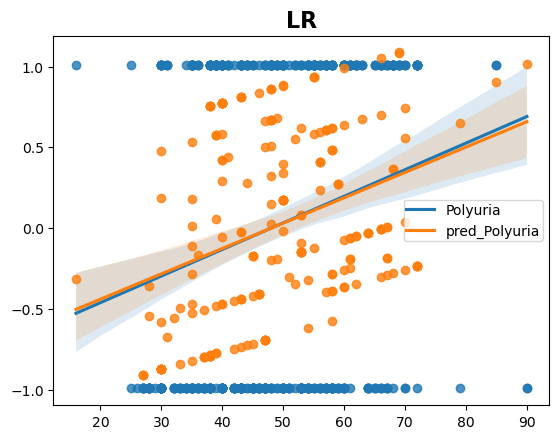

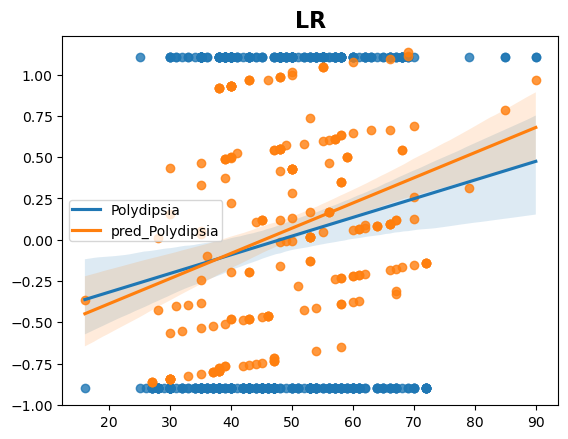

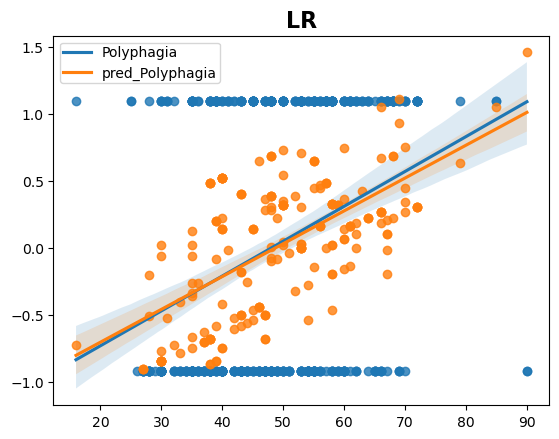

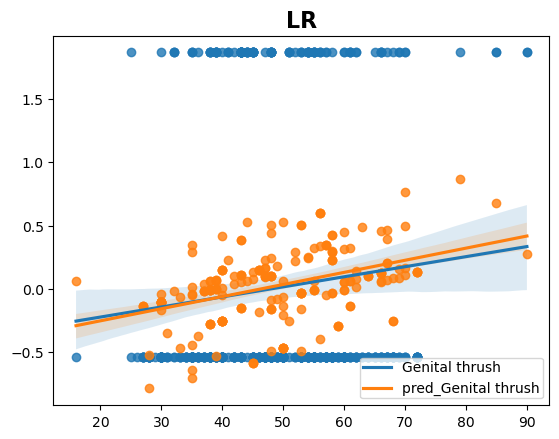

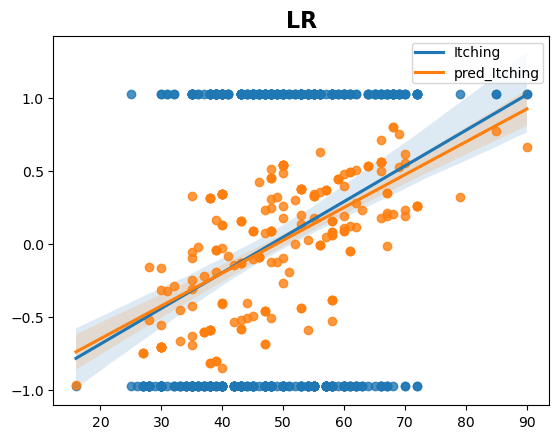

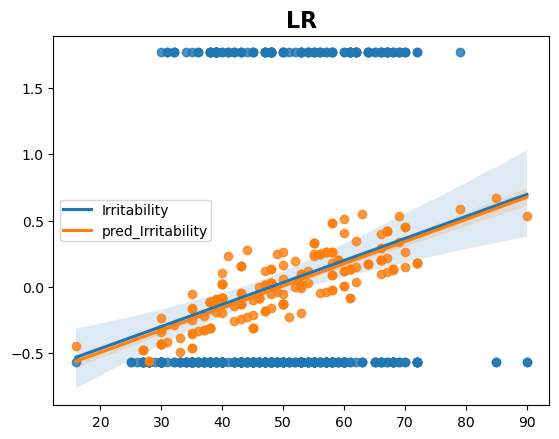

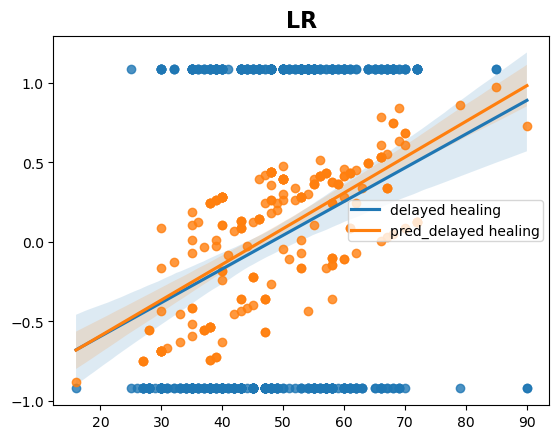

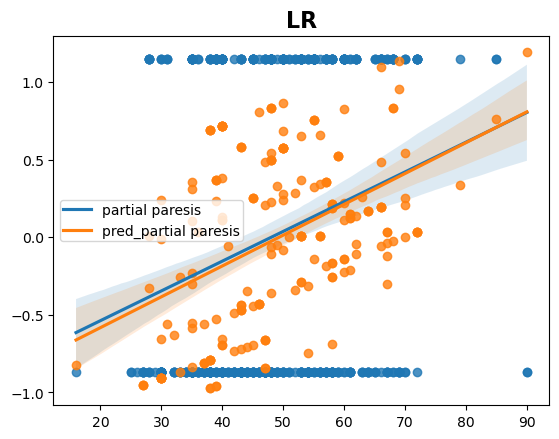

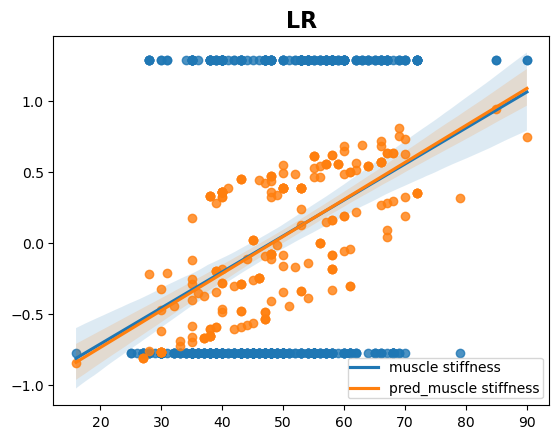

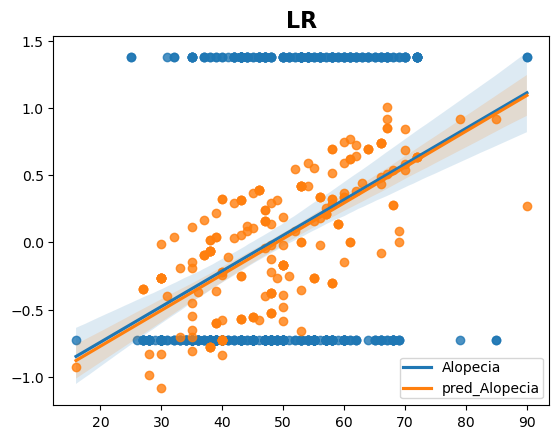

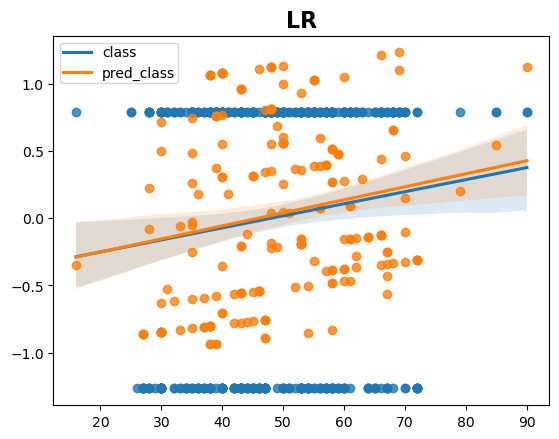

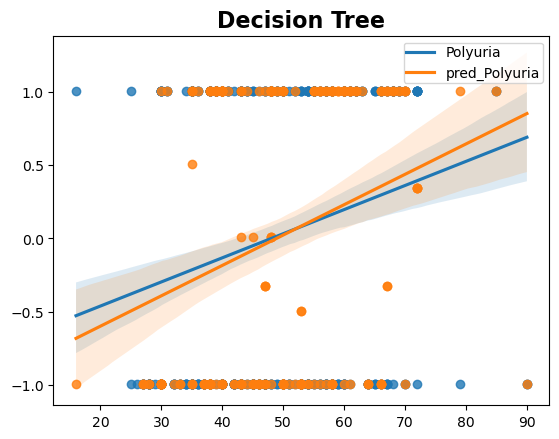

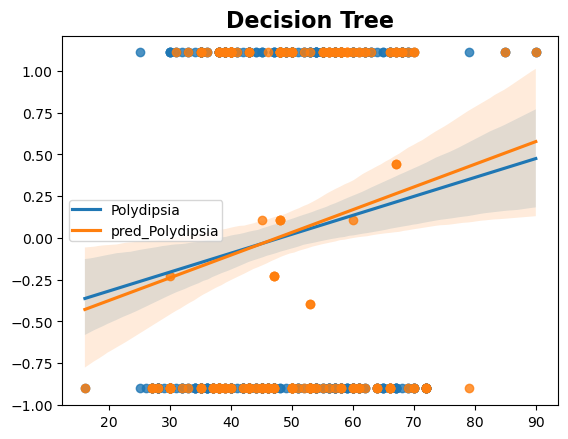

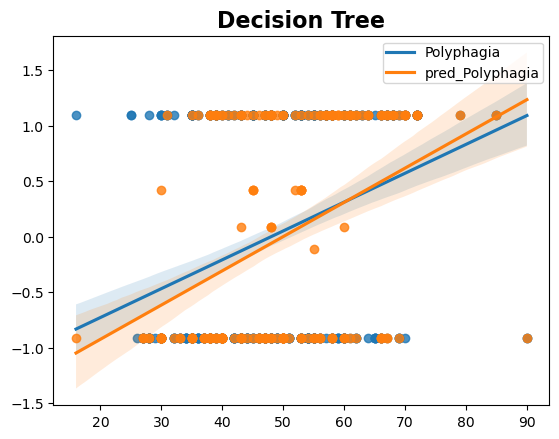

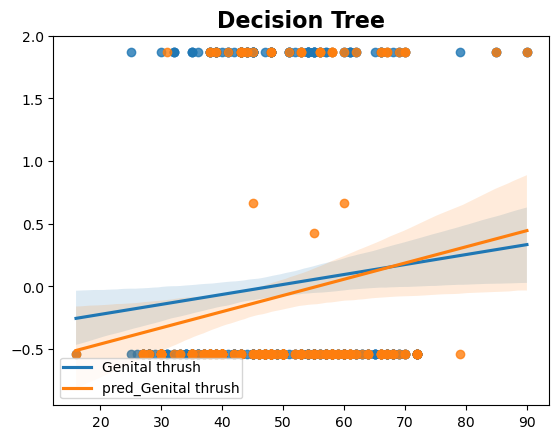

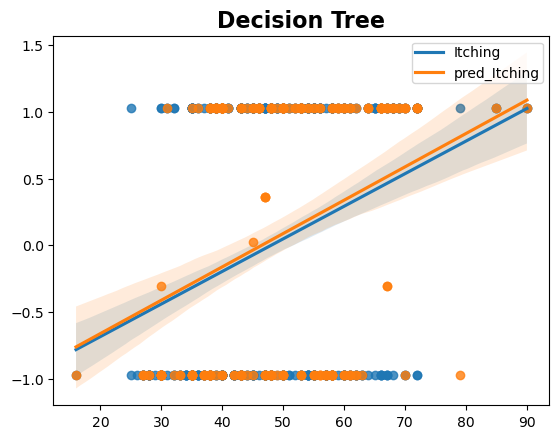

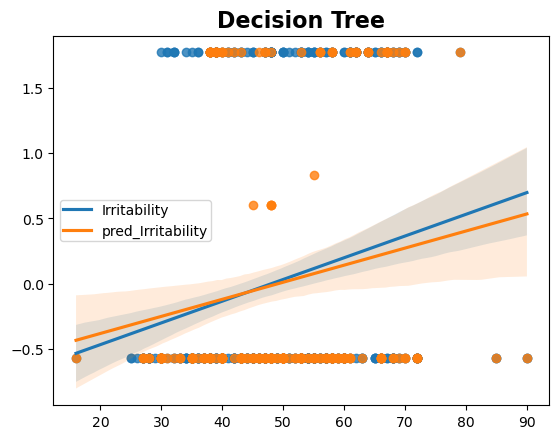

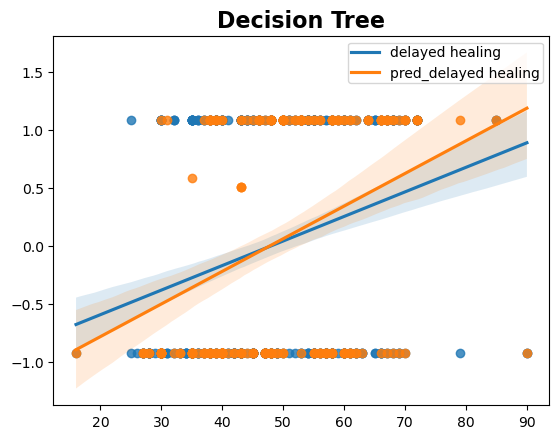

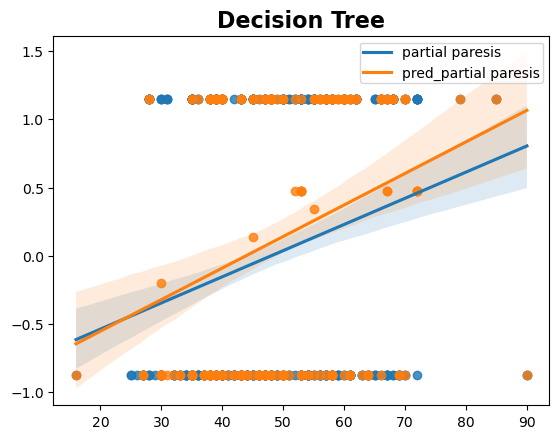

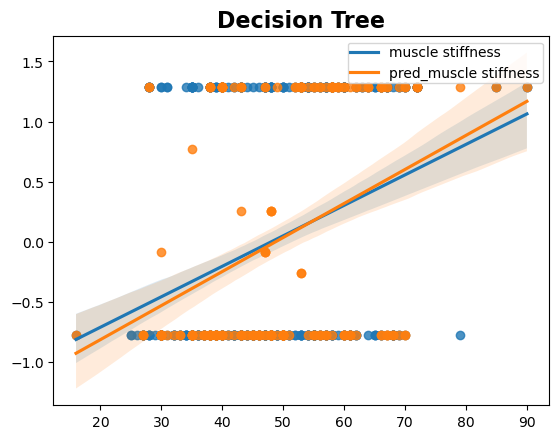

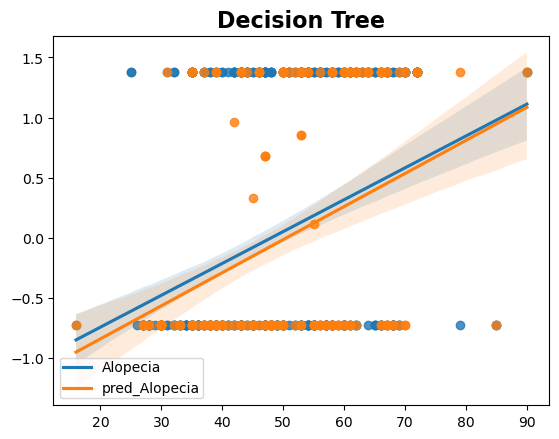

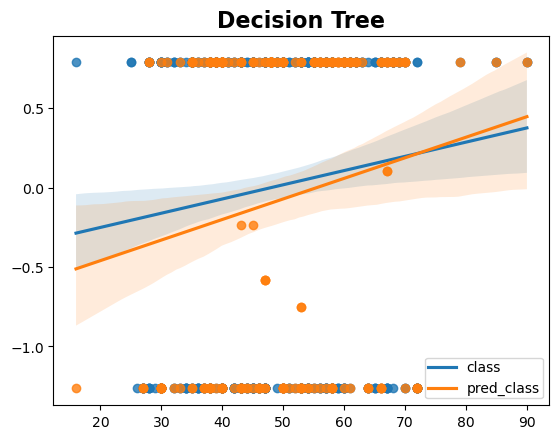

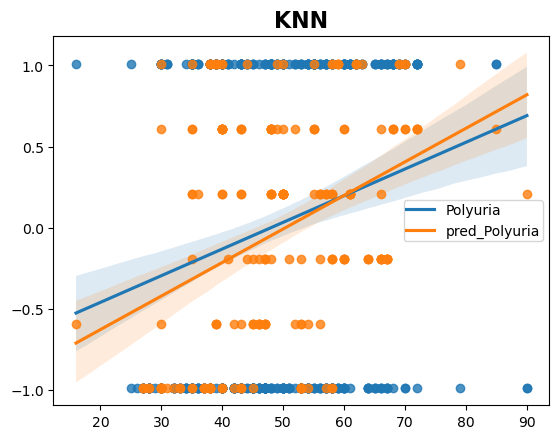

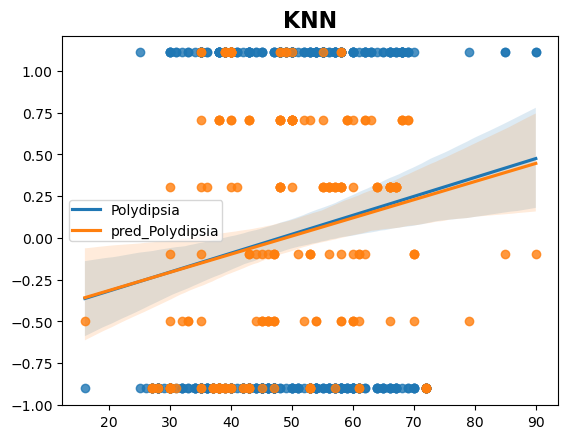

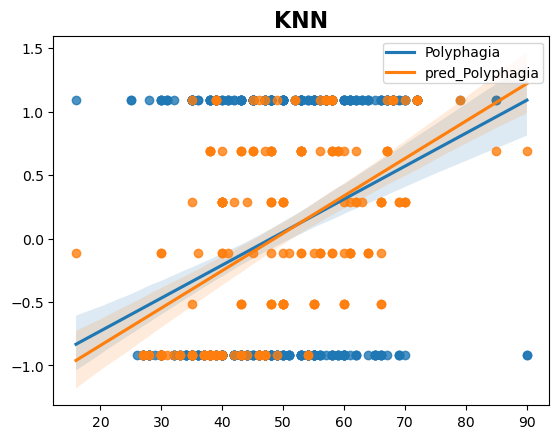

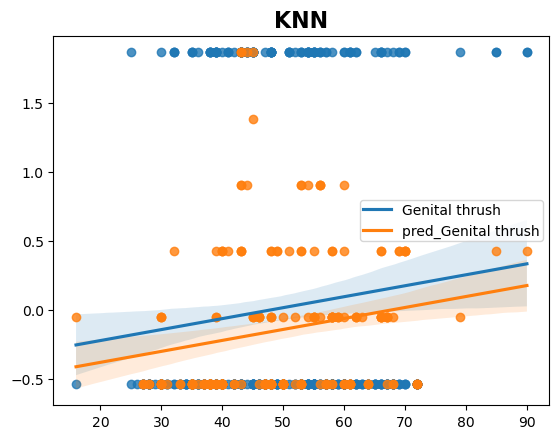

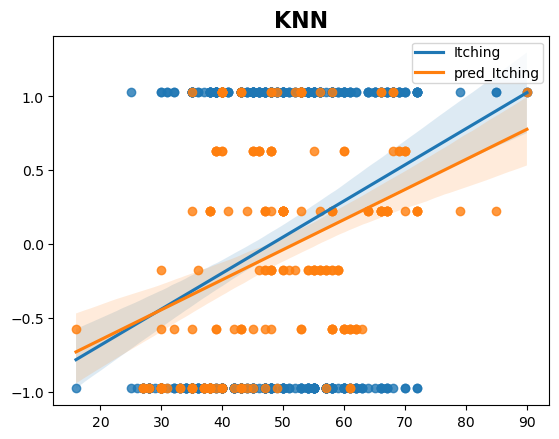

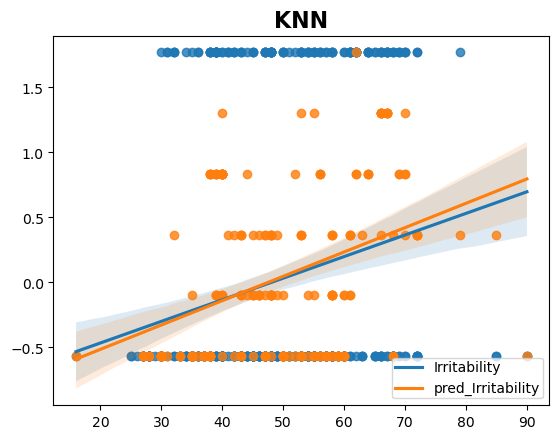

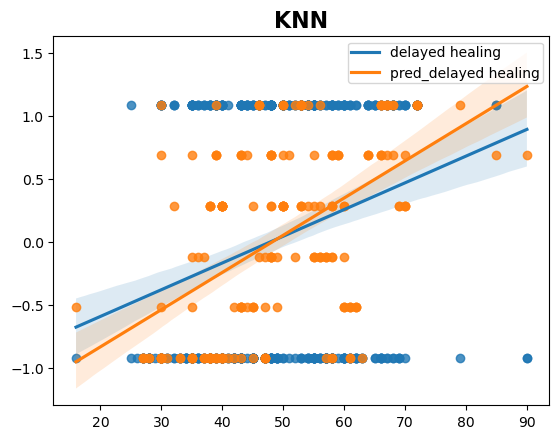

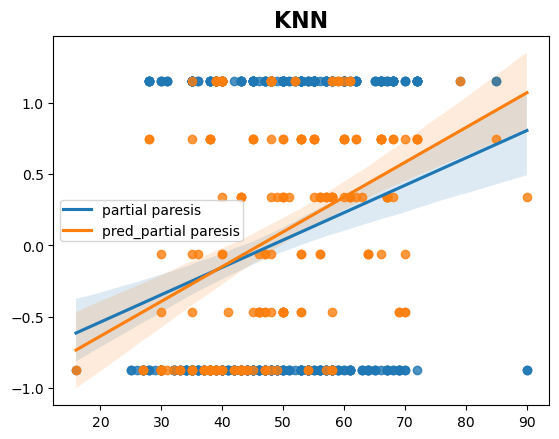

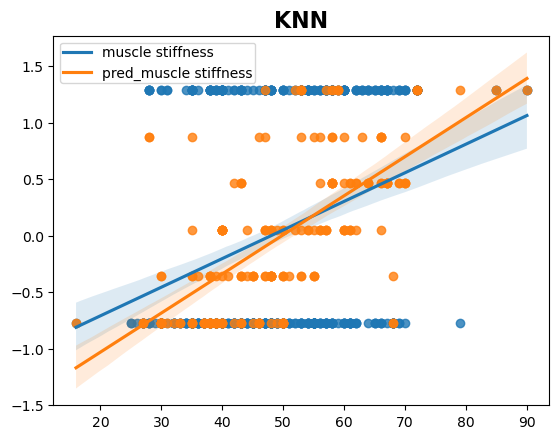

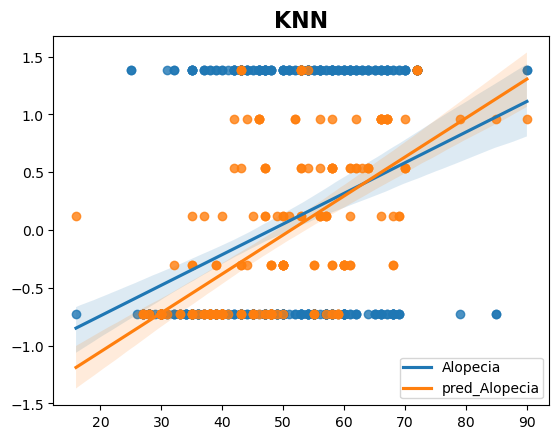

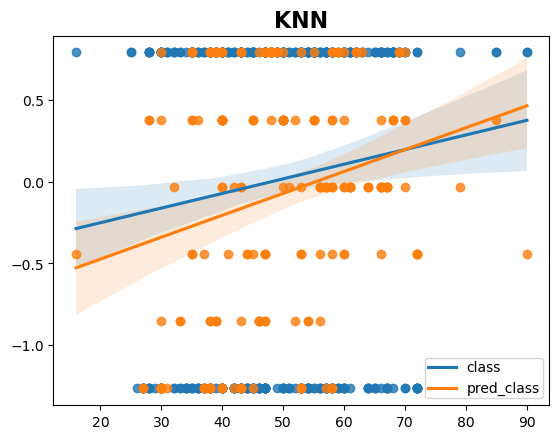

In [13]:
#Hold-Out (60/40)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.40, shuffle=True)

for nombre,modelo in modelos:
    modelo.fit(X_train,y_train)
    y_pred = modelo.predict(X_test)
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,0], line_kws={'label': 'Polyuria'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,0], line_kws={'label': 'pred_Polyuria'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    fig, bx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,1], line_kws={'label': 'Polydipsia'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,1], line_kws={'label': 'pred_Polydipsia'})
    bx.legend(borderpad=.2)
    bx.set_title(nombre,fontsize=16, weight="bold")
    fig, cx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,2], line_kws={'label': 'Polyphagia'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,2], line_kws={'label': 'pred_Polyphagia'})
    cx.legend(borderpad=.2)
    cx.set_title(nombre,fontsize=16, weight="bold")
    fig, dx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,3], line_kws={'label': 'Genital thrush'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,3], line_kws={'label': 'pred_Genital thrush'})
    dx.legend(borderpad=.2)
    dx.set_title(nombre,fontsize=16, weight="bold")
    fig, ex = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,4], line_kws={'label': 'Itching'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,4], line_kws={'label': 'pred_Itching'})
    ex.legend(borderpad=.2)
    ex.set_title(nombre,fontsize=16, weight="bold")
    fig, fx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,5], line_kws={'label': 'Irritability'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,5], line_kws={'label': 'pred_Irritability'})
    fx.legend(borderpad=.2)
    fx.set_title(nombre,fontsize=16, weight="bold")
    fig, gx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,6], line_kws={'label': 'delayed healing'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,6], line_kws={'label': 'pred_delayed healing'})
    gx.legend(borderpad=.2)
    gx.set_title(nombre,fontsize=16, weight="bold")
    fig, hx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,7], line_kws={'label': 'partial paresis'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,7], line_kws={'label': 'pred_partial paresis'})
    hx.legend(borderpad=.2)
    hx.set_title(nombre,fontsize=16, weight="bold")
    fig, ix = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,8], line_kws={'label': 'muscle stiffness'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,8], line_kws={'label': 'pred_muscle stiffness'})
    ix.legend(borderpad=.2)
    ix.set_title(nombre,fontsize=16, weight="bold")
    fig, jx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,9], line_kws={'label': 'Alopecia'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,9], line_kws={'label': 'pred_Alopecia'})
    jx.legend(borderpad=.2)
    jx.set_title(nombre,fontsize=16, weight="bold")
    fig, kx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,10], line_kws={'label': 'class'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,10], line_kws={'label': 'pred_class'})
    kx.legend(borderpad=.2)
    kx.set_title(nombre,fontsize=16, weight="bold")

    
    try:
        RMSLE = mean_squared_log_error(y_test,y_pred,squared=False)
    except:
        RMSLE = 1.0
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,np.sum((y_test-y_pred)**2)))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,mean_absolute_error(y_test,y_pred)))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,mean_squared_error(y_test,y_pred)))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,mean_squared_error(y_test,y_pred,squared=False)))
    #RMSLE (Root Mean Squared Logaritmic Error)
    resultado_RMSLE.append((nombre,RMSLE))

resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSLE.sort(key=lambda k:k[1], reverse=True)

In [14]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('Decision Tree', array([0.61594346])),
 ('KNN', array([0.50759584])),
 ('LR', array([0.43354861]))]

In [15]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('Decision Tree', array([0.37938634])),
 ('KNN', array([0.25765354])),
 ('LR', array([0.1879644]))]

In [16]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('LR', 1888.4304843396328),
 ('KNN', 1806.8600084611503),
 ('Decision Tree', 1731.5910552046053)]

In [17]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('LR', 0.7748890227001222),
 ('KNN', 0.6198184124119375),
 ('Decision Tree', 0.3841963374337528)]

In [18]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('LR', 0.8253629739246647),
 ('KNN', 0.7897115421595937),
 ('Decision Tree', 0.756814272379635)]

In [19]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('LR', 0.9076589347183653),
 ('KNN', 0.887650708961872),
 ('Decision Tree', 0.8686259019150154)]

In [20]:
print("RMSLE (Root Mean Squared Logaritmic Error)")
resultado_RMSLE

RMSLE (Root Mean Squared Logaritmic Error)


[('LR', 1.0), ('Decision Tree', 1.0), ('KNN', 1.0)]

In [21]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_RMSLE.clear()

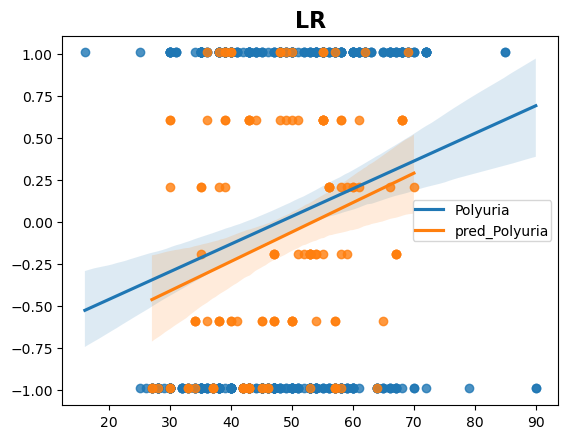

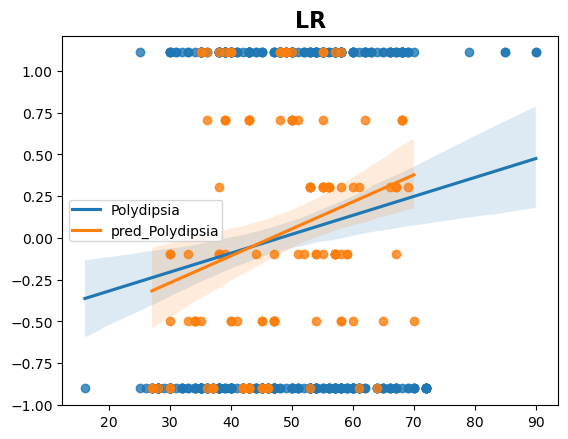

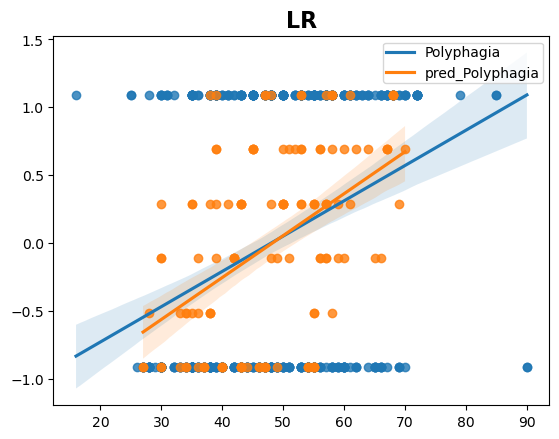

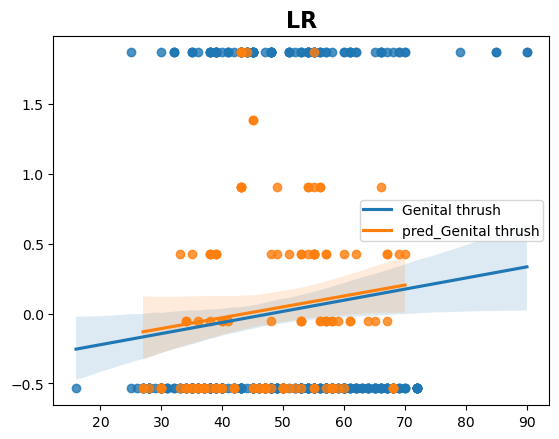

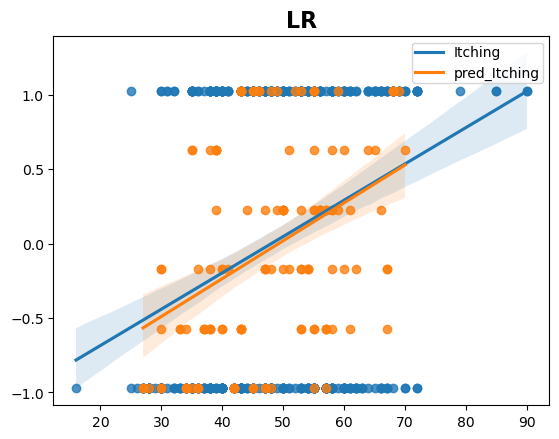

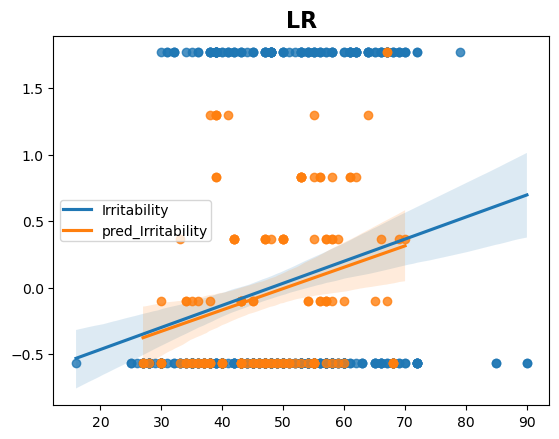

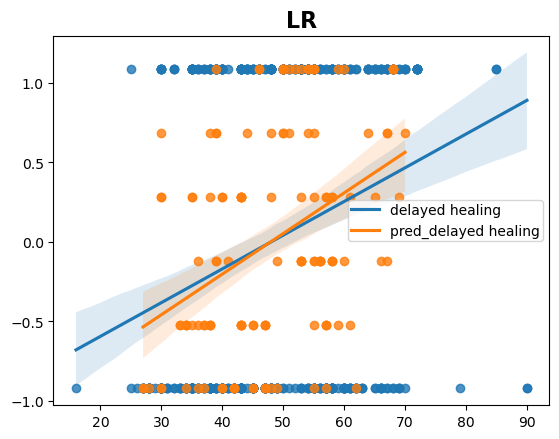

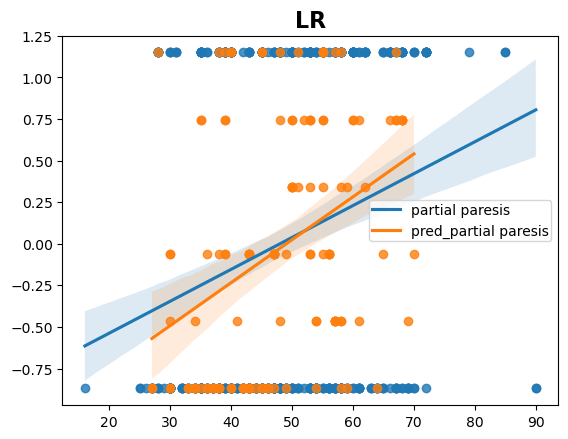

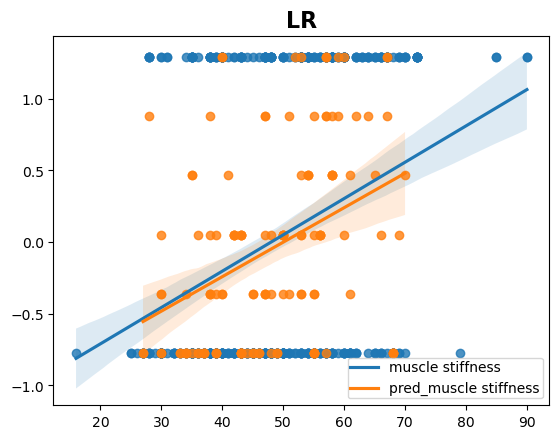

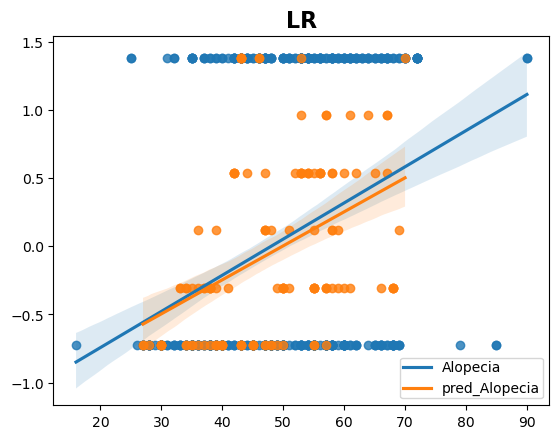

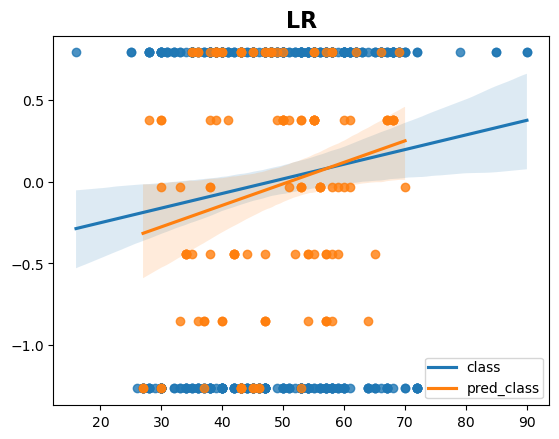

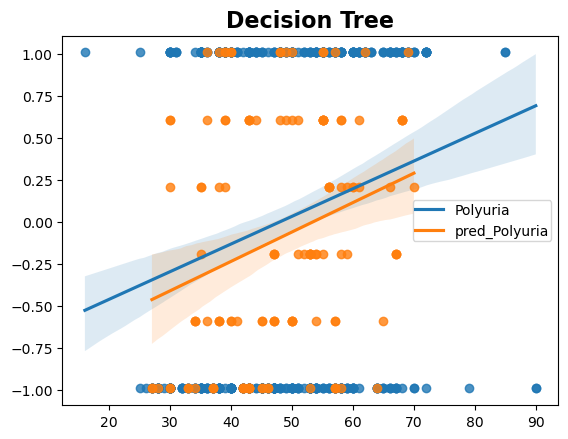

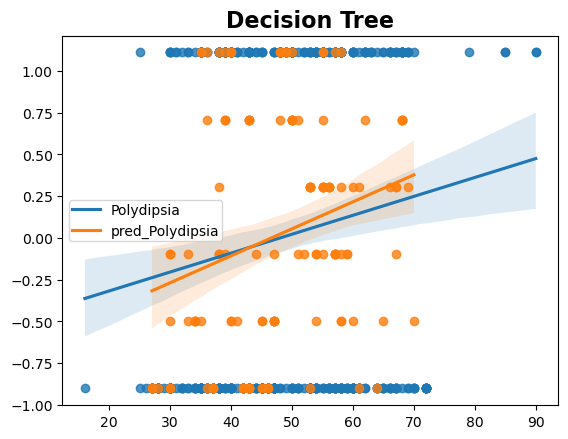

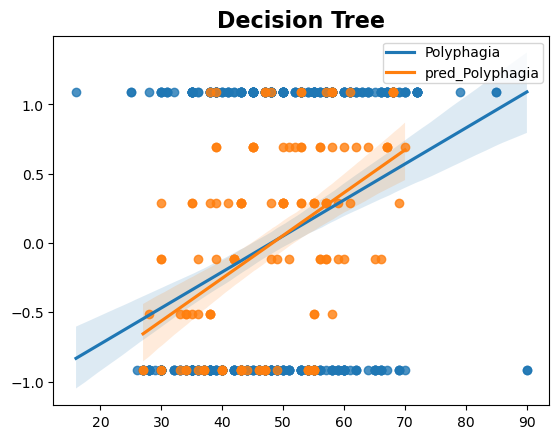

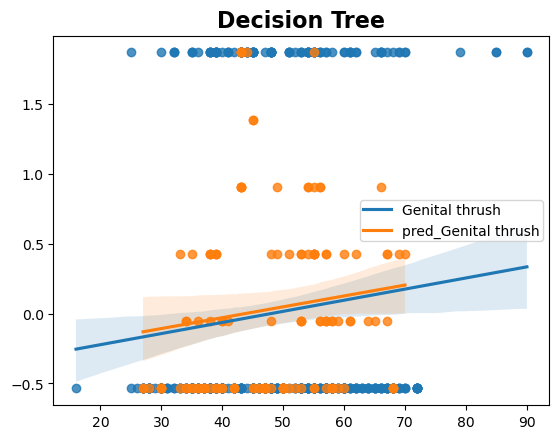

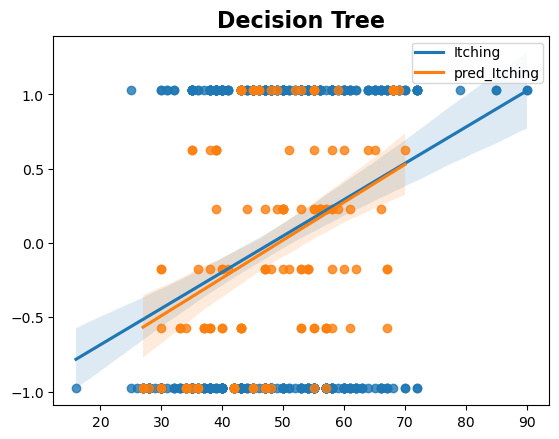

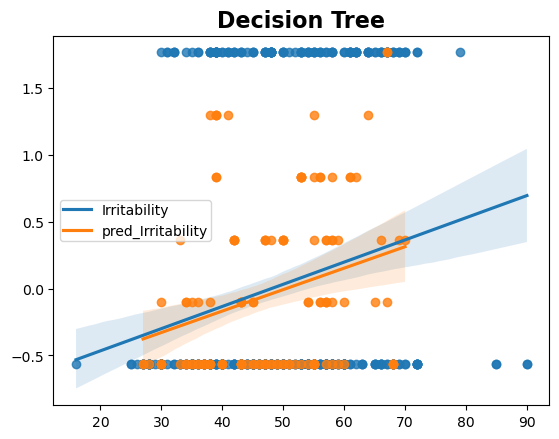

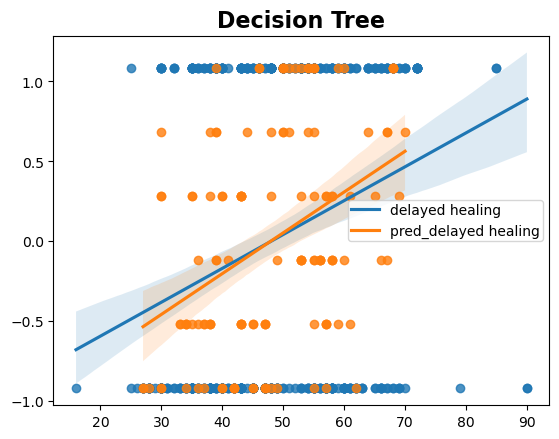

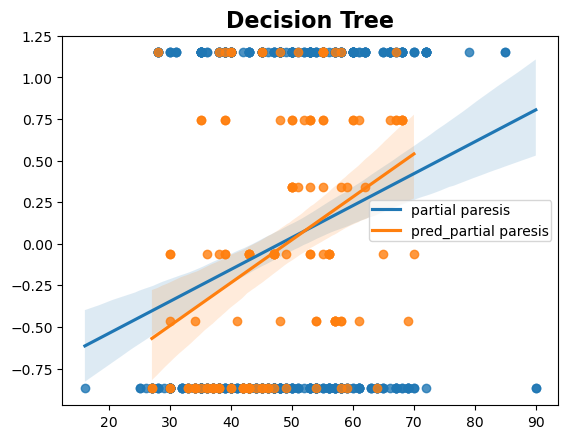

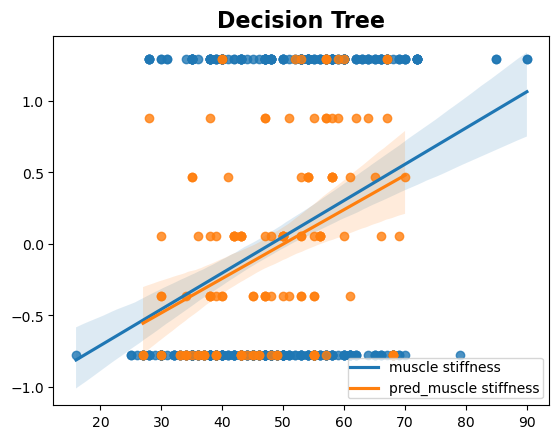

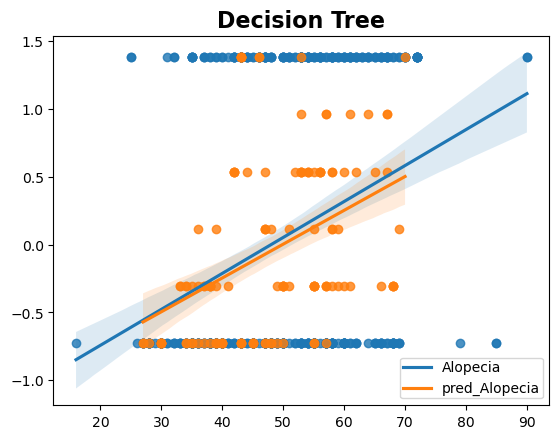

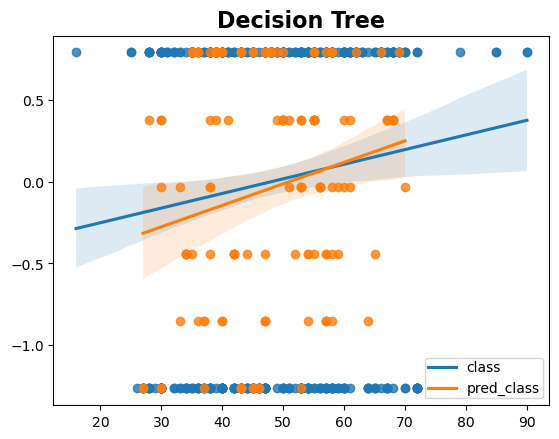

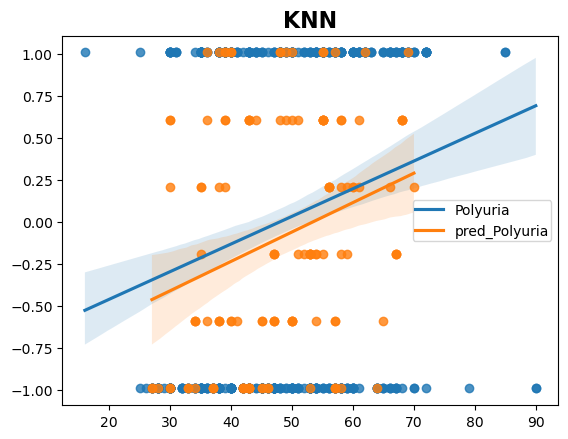

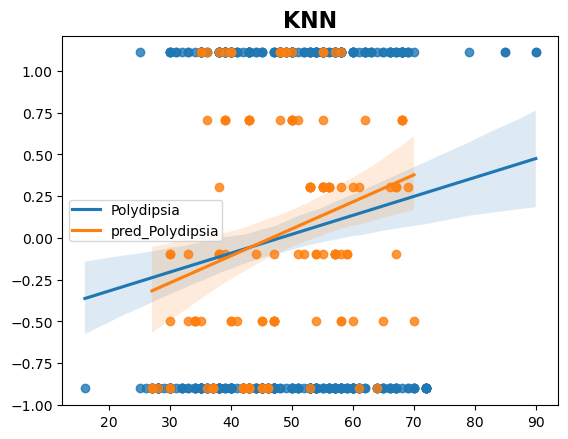

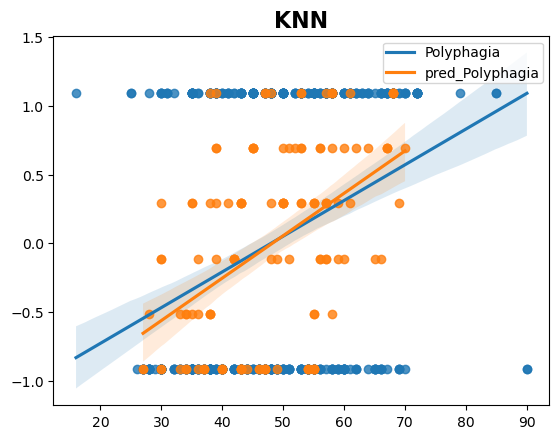

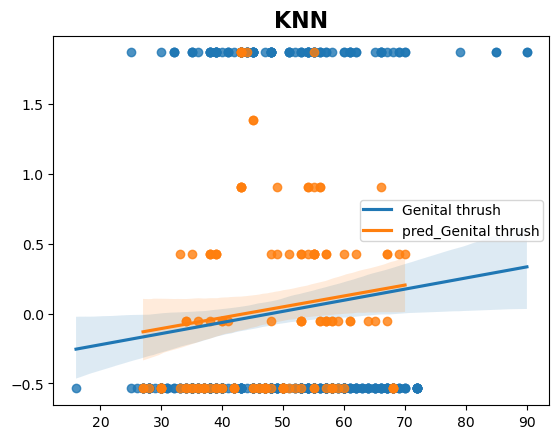

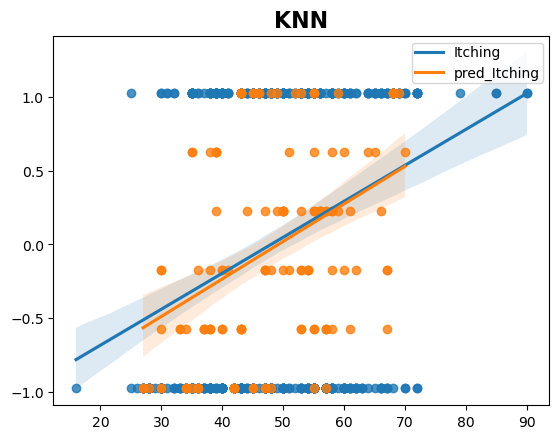

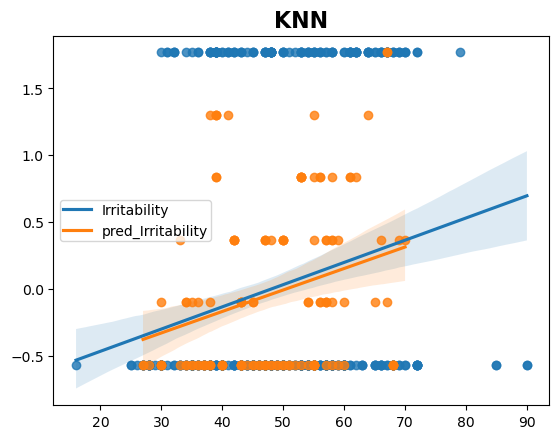

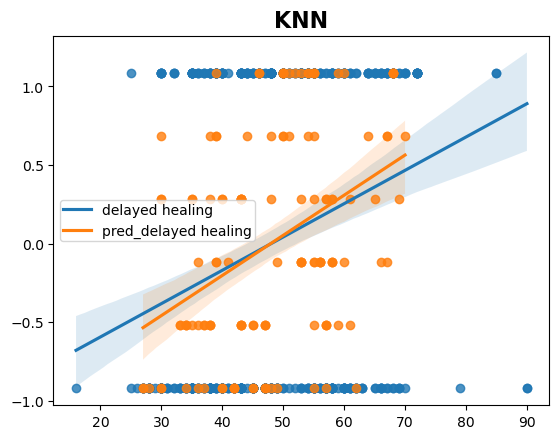

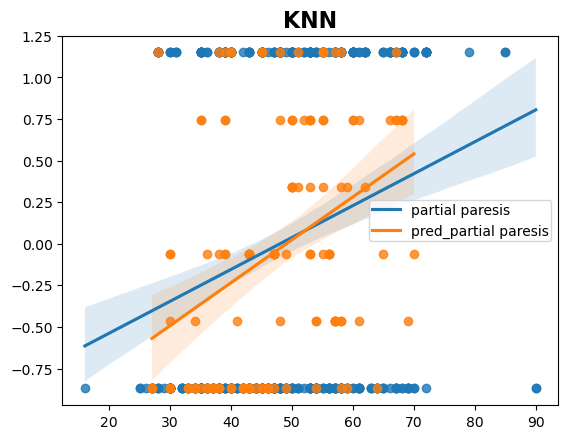

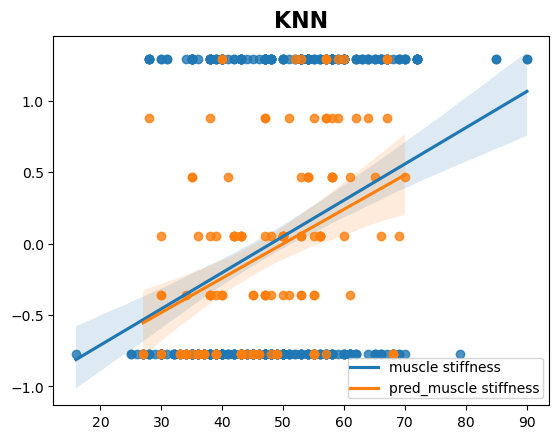

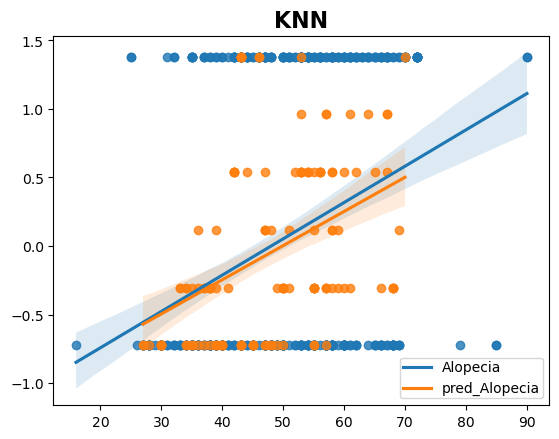

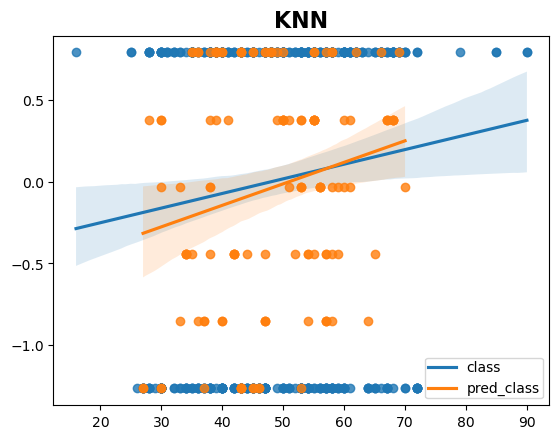

In [22]:
#Random subsampling (N=30)
R = [0,0,0]
R2 = [0,0,0]
SSE = [0,0,0]
MAE = [0,0,0]
MSE = [0,0,0]
RMSE = [0,0,0]
RMSLE1 = 0.0
RMSLE2 = 0.0
RMSLE3 = 0.0

l_test = [0,0,0]
l_pred = [0,0,0]

for i in range(30):
    j=0
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, shuffle=True)

    for nombre,modelo in modelos:
        modelo.fit(X_train,y_train)
        y_pred = modelo.predict(X_test)
        if i == 0:
            l_test[j] = y_test
            l_pred[j] = y_pred
        else:
            for k in range(len(y_test)):
                l_test[j][k] += y_test[k]
                l_pred[j][k] += y_pred[k]
        
        try:
            RMSLE = mean_squared_log_error(y_test,y_pred,squared=False)
        except:
            RMSLE = 1.0
            
        #R (Pearson correlation coefficient)
        R[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))
        #R2 (coefficient of determination)
        R2[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2
        #SSE (sum of squared errors)
        SSE[j] += np.sum((y_test-y_pred)**2)
        #MAE (mean absolute error)
        MAE[j] += mean_absolute_error(y_test,y_pred)
        #MSE (mean squared error)
        MSE[j] += mean_squared_error(y_test,y_pred)
        #RMSE (root mean squared error)
        RMSE[j] += mean_squared_error(y_test,y_pred,squared=False)
        #RMSLE (Root Mean Squared Logaritmic Error)
        if nombre == "LR":
            RMSLE1 += RMSLE
        elif nombre == "Decision Tree":
            RMSLE2 += RMSLE
        else:
            RMSLE3 += RMSLE
        
        j += 1
        
j=0
for nombre, modelo in modelos:
    for k in range(len(y_test)):
        l_test[j][k] /= 30
        l_pred[j][k] /= 30
    
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,0], line_kws={'label': 'Polyuria'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,0], line_kws={'label': 'pred_Polyuria'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    fig, bx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,1], line_kws={'label': 'Polydipsia'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,1], line_kws={'label': 'pred_Polydipsia'})
    bx.legend(borderpad=.2)
    bx.set_title(nombre,fontsize=16, weight="bold")
    fig, cx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,2], line_kws={'label': 'Polyphagia'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,2], line_kws={'label': 'pred_Polyphagia'})
    cx.legend(borderpad=.2)
    cx.set_title(nombre,fontsize=16, weight="bold")
    fig, dx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,3], line_kws={'label': 'Genital thrush'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,3], line_kws={'label': 'pred_Genital thrush'})
    dx.legend(borderpad=.2)
    dx.set_title(nombre,fontsize=16, weight="bold")
    fig, ex = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,4], line_kws={'label': 'Itching'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,4], line_kws={'label': 'pred_Itching'})
    ex.legend(borderpad=.2)
    ex.set_title(nombre,fontsize=16, weight="bold")
    fig, fx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,5], line_kws={'label': 'Irritability'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,5], line_kws={'label': 'pred_Irritability'})
    fx.legend(borderpad=.2)
    fx.set_title(nombre,fontsize=16, weight="bold")
    fig, gx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,6], line_kws={'label': 'delayed healing'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,6], line_kws={'label': 'pred_delayed healing'})
    gx.legend(borderpad=.2)
    gx.set_title(nombre,fontsize=16, weight="bold")
    fig, hx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,7], line_kws={'label': 'partial paresis'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,7], line_kws={'label': 'pred_partial paresis'})
    hx.legend(borderpad=.2)
    hx.set_title(nombre,fontsize=16, weight="bold")
    fig, ix = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,8], line_kws={'label': 'muscle stiffness'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,8], line_kws={'label': 'pred_muscle stiffness'})
    ix.legend(borderpad=.2)
    ix.set_title(nombre,fontsize=16, weight="bold")
    fig, jx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,9], line_kws={'label': 'Alopecia'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,9], line_kws={'label': 'pred_Alopecia'})
    jx.legend(borderpad=.2)
    jx.set_title(nombre,fontsize=16, weight="bold")
    fig, kx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,10], line_kws={'label': 'class'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,10], line_kws={'label': 'pred_class'})
    kx.legend(borderpad=.2)
    kx.set_title(nombre,fontsize=16, weight="bold")
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,R[j]/30))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,R2[j]/30))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,SSE[j]/30))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,MAE[j]/30))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,MSE[j]/30))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,RMSE[j]/30))
    #RMSLE (Root Mean Squared Logaritmic Error)
    if nombre == "LR":
        resultado_RMSLE.append((nombre,RMSLE1/30))
    elif nombre == "Decision Tree":
        resultado_RMSLE.append((nombre,RMSLE2/30))
    else:
        resultado_RMSLE.append((nombre,RMSLE3/30))
    
    j += 1
    
resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSLE.sort(key=lambda k:k[1], reverse=True)

In [23]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('Decision Tree', array([0.66577396])),
 ('KNN', array([0.5707344])),
 ('LR', array([0.42828138]))]

In [24]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('Decision Tree', array([0.44456198])),
 ('KNN', array([0.326301])),
 ('LR', array([0.1839023]))]

In [25]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('LR', 1171.67498067465),
 ('KNN', 995.2703358893923),
 ('Decision Tree', 920.7338313826665)]

In [26]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('LR', 0.7731238868827076),
 ('KNN', 0.5644085376318281),
 ('Decision Tree', 0.34477777993724984)]

In [27]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('LR', 0.8193531333389159),
 ('KNN', 0.6959932418806937),
 ('Decision Tree', 0.643869812155711)]

In [28]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('LR', 0.9035404410602436),
 ('KNN', 0.8322891049028548),
 ('Decision Tree', 0.797967713506374)]

In [29]:
print("RMSLE (Root Mean Squared Logaritmic Error)")
resultado_RMSLE

RMSLE (Root Mean Squared Logaritmic Error)


[('LR', 1.0), ('Decision Tree', 1.0), ('KNN', 1.0)]

In [30]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_RMSLE.clear()
R.clear()
R2.clear()
SSE.clear()
MAE.clear()
MSE.clear()
RMSE.clear()
l_test.clear()
l_test.clear()
l_test.clear()
l_pred.clear()
l_pred.clear()
l_pred.clear()

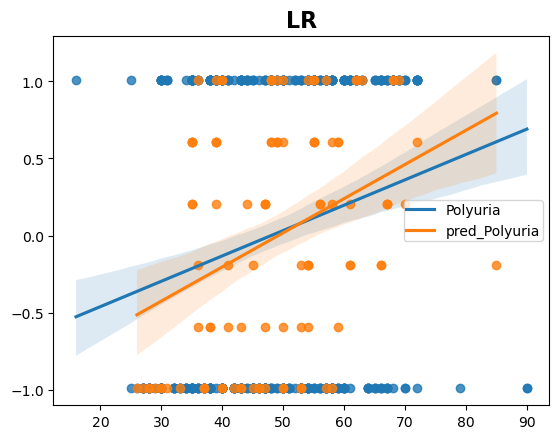

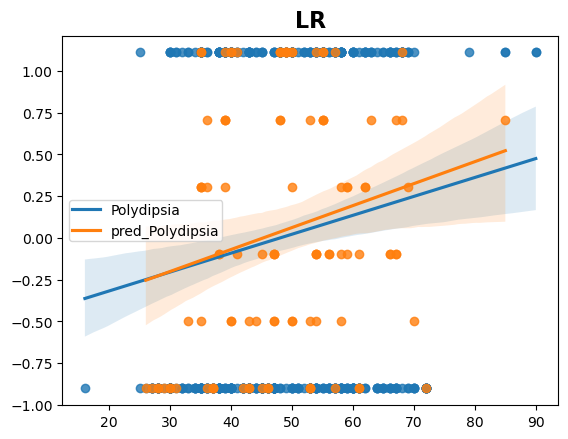

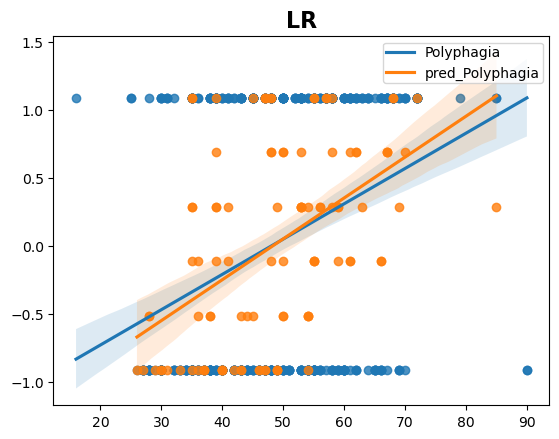

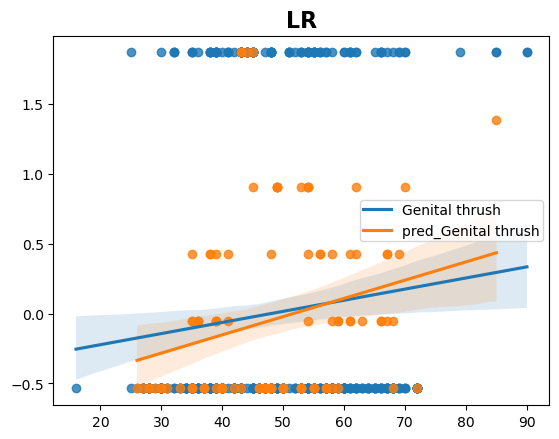

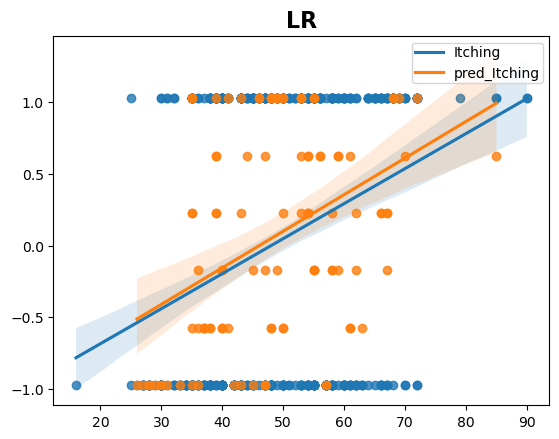

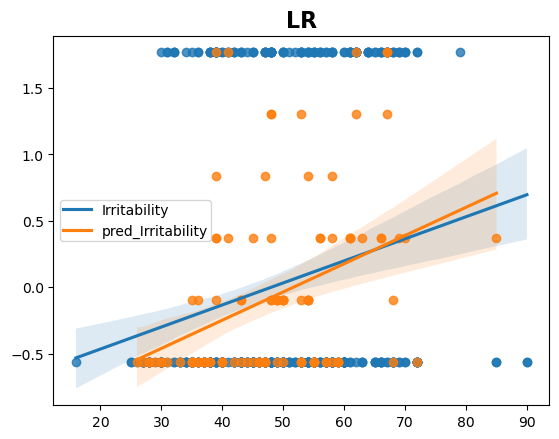

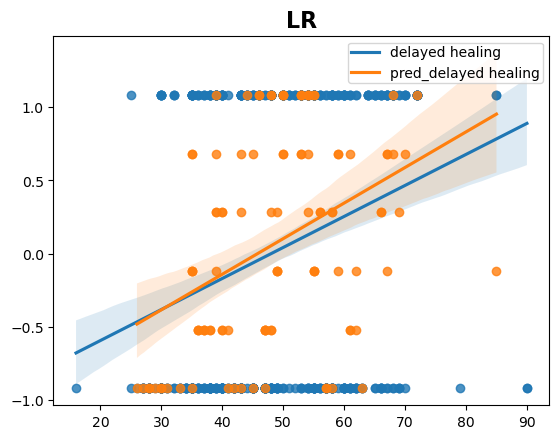

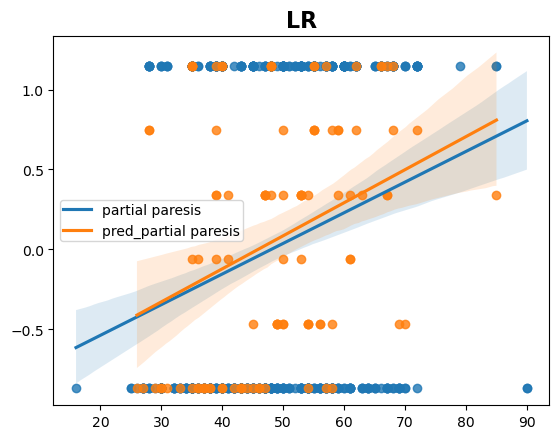

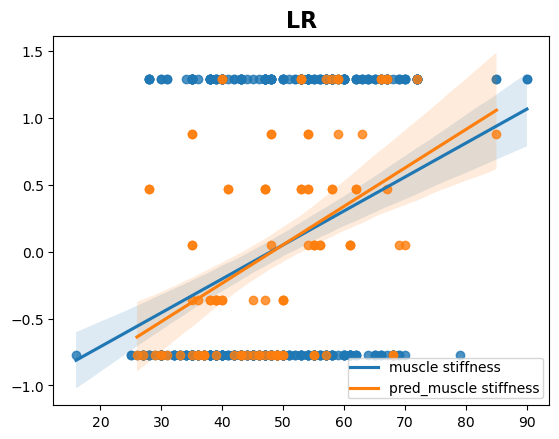

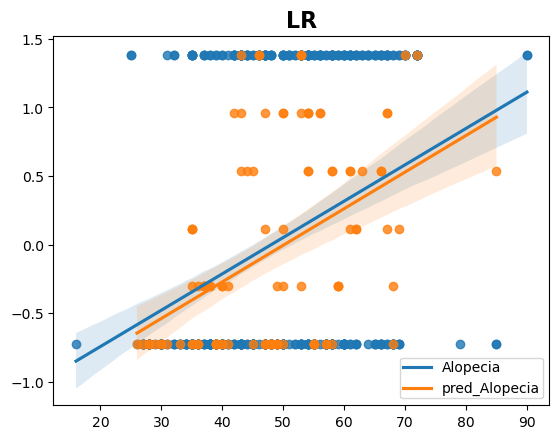

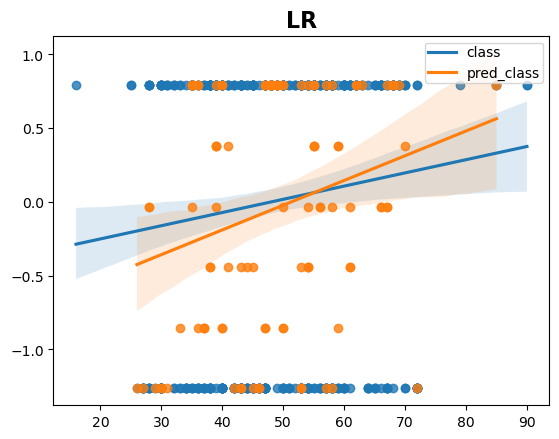

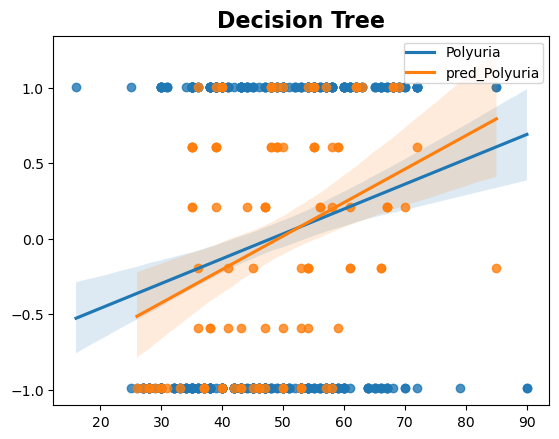

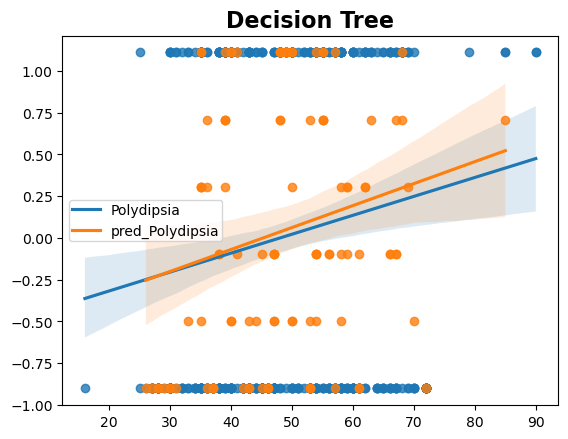

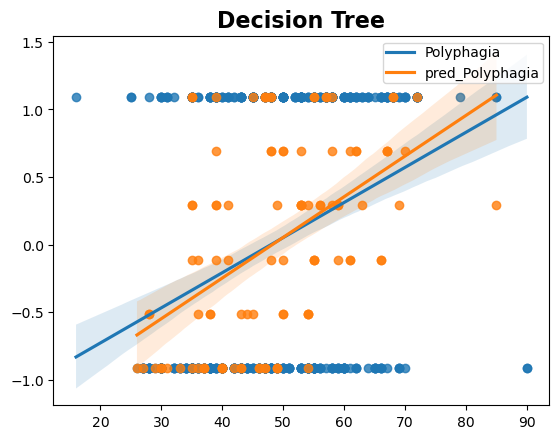

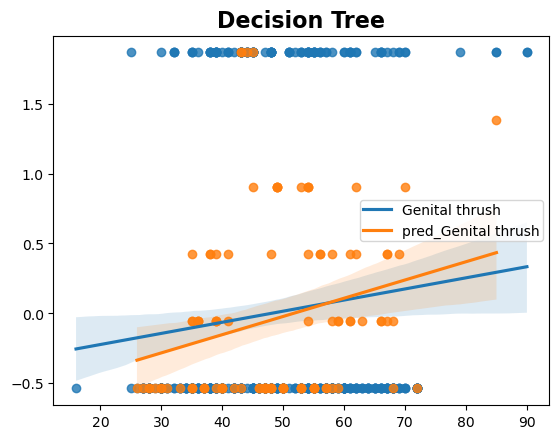

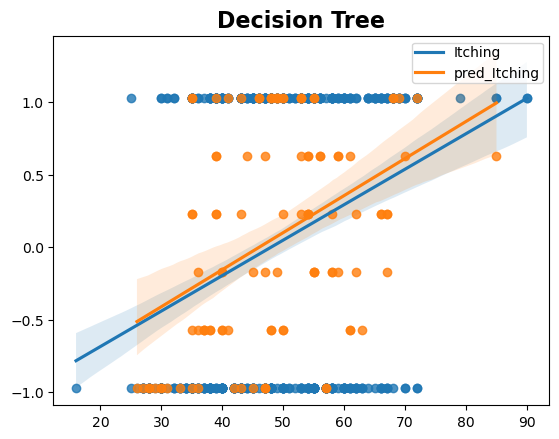

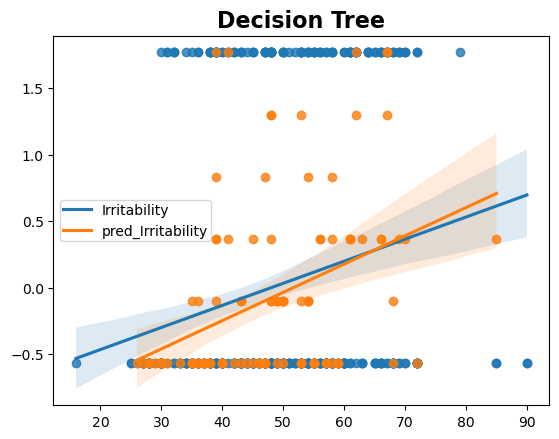

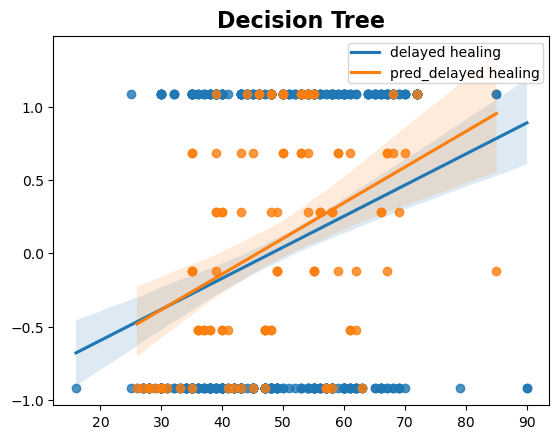

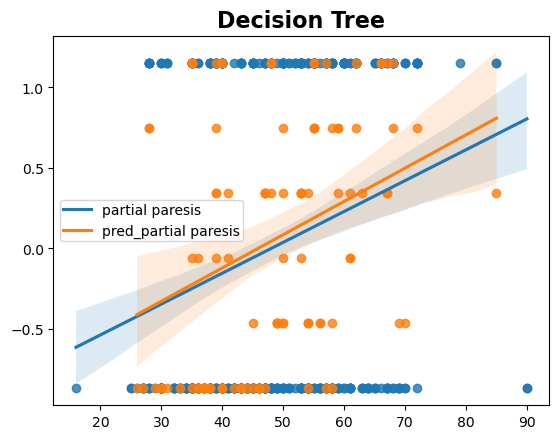

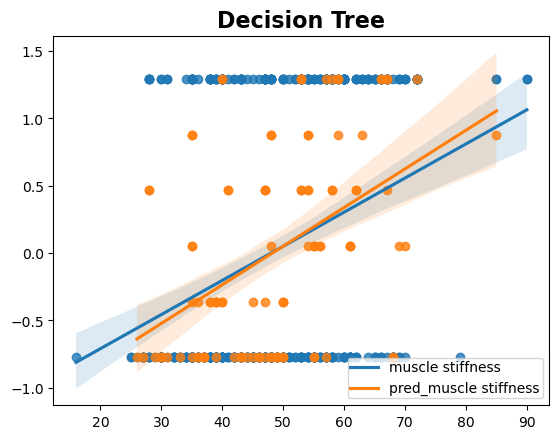

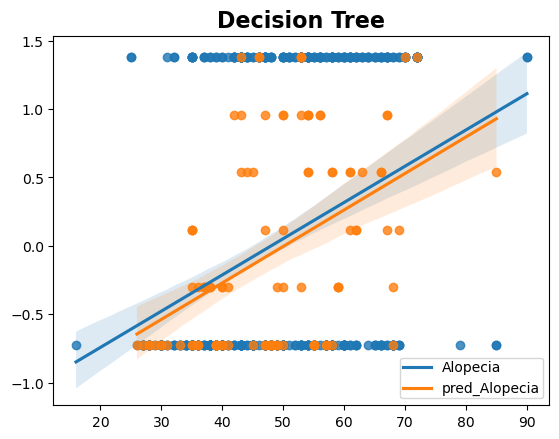

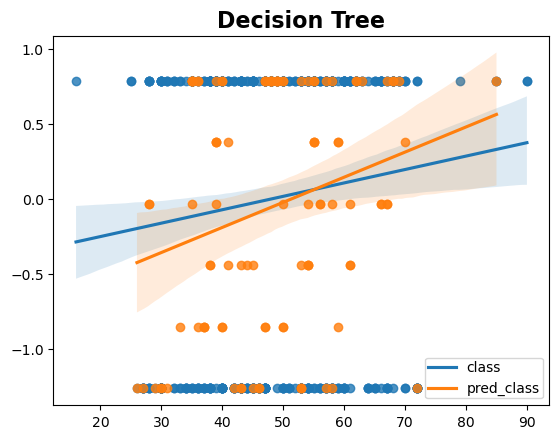

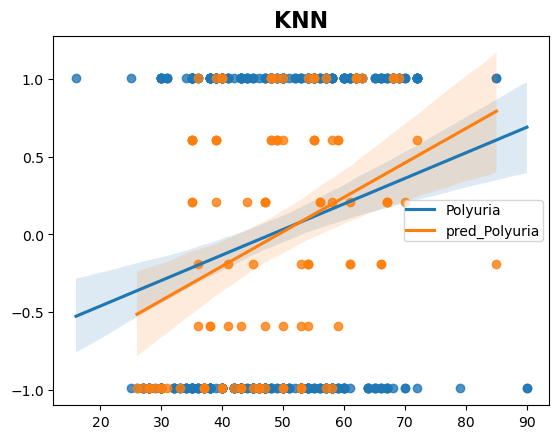

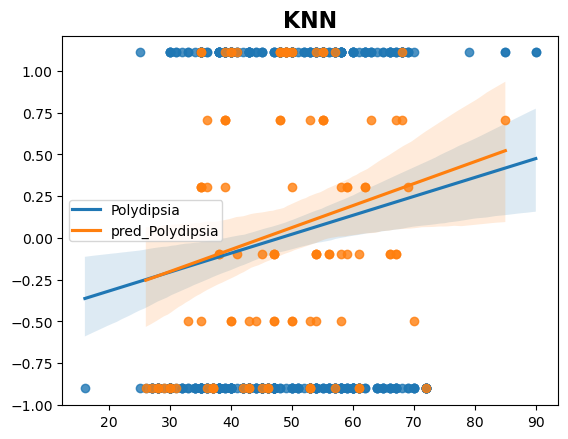

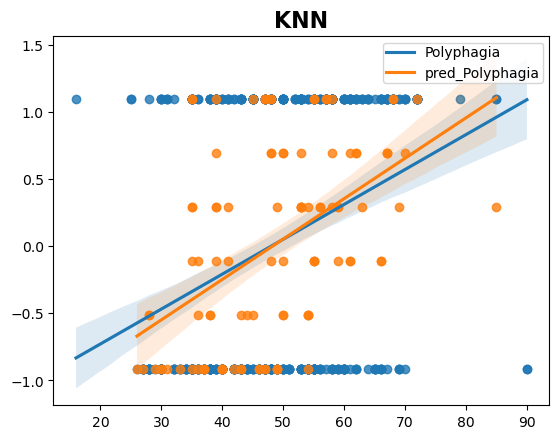

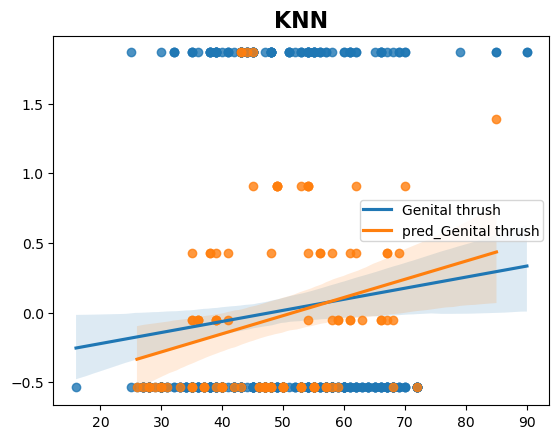

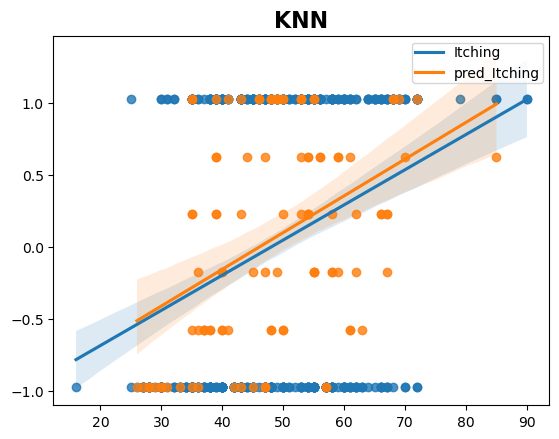

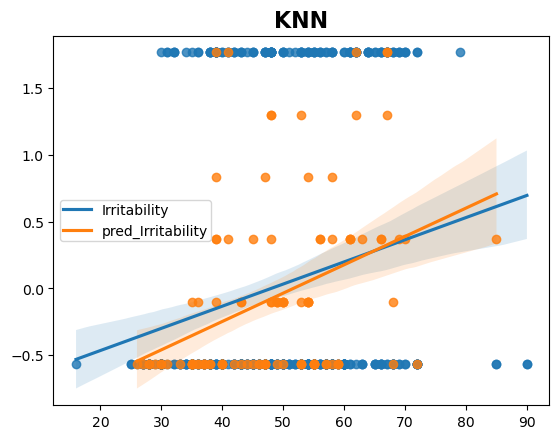

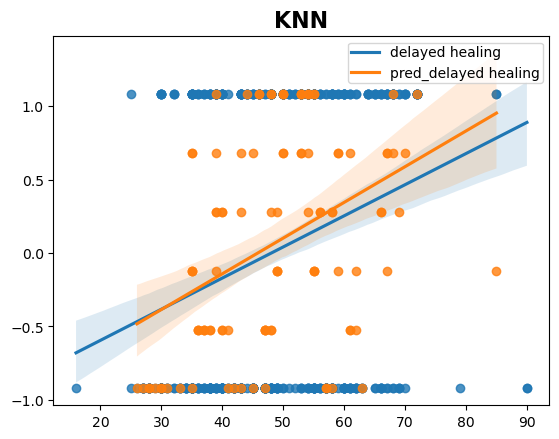

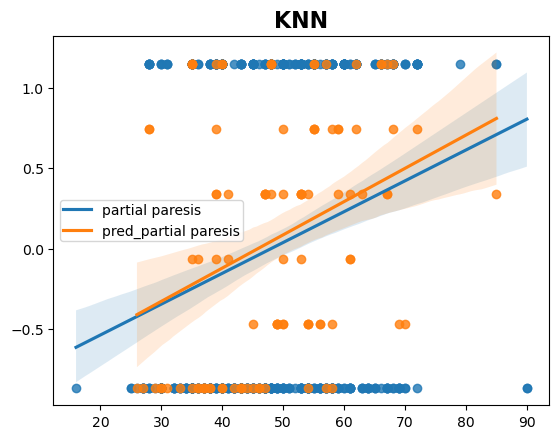

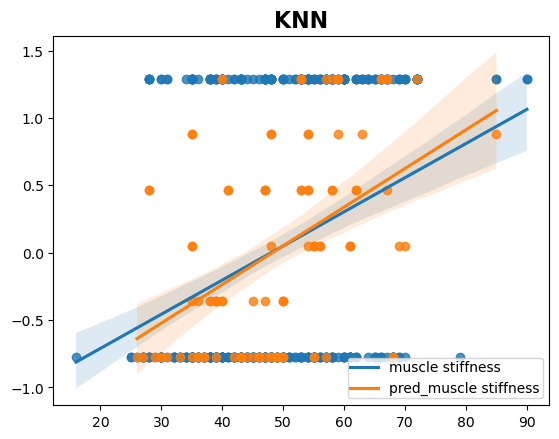

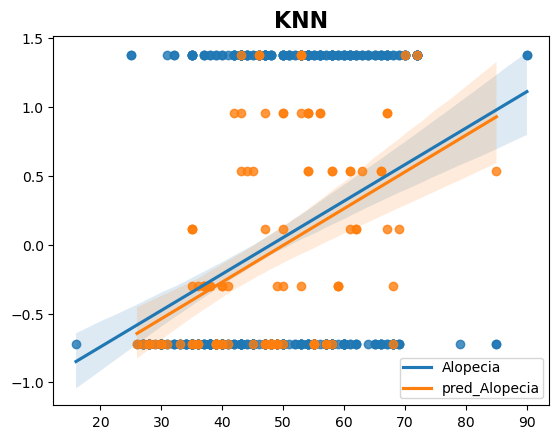

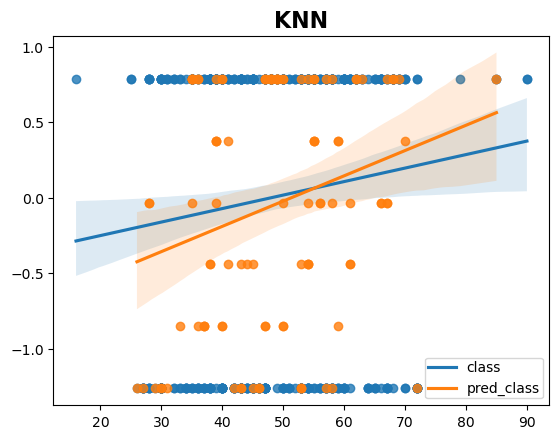

In [31]:
#K-fold (K=5)
R = [0,0,0]
R2 = [0,0,0]
SSE = [0,0,0]
MAE = [0,0,0]
MSE = [0,0,0]
RMSE = [0,0,0]
RMSLE1 = 0.0
RMSLE2 = 0.0
RMSLE3 = 0.0
l_test = [0,0,0]
l_pred = [0,0,0]

i = 0

kf = KFold(n_splits=5, shuffle=True)

for train,test in kf.split(X_res):
    j=0
    X_train, X_test, y_train, y_test = X_res[train], X_res[test], y_res[train], y_res[test]

    for nombre,modelo in modelos:
        modelo.fit(X_train,y_train)
        y_pred = modelo.predict(X_test)
        if i == 0:
            l_test[j] = y_test
            l_pred[j] = y_pred
            if nombre == "KNN":
                i = 1
        else:
            for k in range(len(y_test)):
                l_test[j][k] += y_test[k]
                l_pred[j][k] += y_pred[k]
        
        try:
            RMSLE = mean_squared_log_error(y_test,y_pred,squared=False)
        except:
            RMSLE = 1.0
        
        #R (Pearson correlation coefficient)
        R[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))
        #R2 (coefficient of determination)
        R2[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2
        #SSE (sum of squared errors)
        SSE[j] += np.sum((y_test-y_pred)**2)
        #MAE (mean absolute error)
        MAE[j] += mean_absolute_error(y_test,y_pred)
        #MSE (mean squared error)
        MSE[j] += mean_squared_error(y_test,y_pred)
        #RMSE (root mean squared error)
        RMSE[j] += mean_squared_error(y_test,y_pred,squared=False)
        #RMSLE (Root Mean Squared Logaritmic Error)
        if nombre == "LR":
            RMSLE1 += RMSLE
        elif nombre == "Decision Tree":
            RMSLE2 += RMSLE
        else:
            RMSLE3 += RMSLE
        
        j += 1

j=0
for nombre, modelo in modelos:
    for k in range(len(y_test)):
        l_test[j][k] /= 5
        l_pred[j][k] /= 5
    
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,0], line_kws={'label': 'Polyuria'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,0], line_kws={'label': 'pred_Polyuria'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    fig, bx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,1], line_kws={'label': 'Polydipsia'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,1], line_kws={'label': 'pred_Polydipsia'})
    bx.legend(borderpad=.2)
    bx.set_title(nombre,fontsize=16, weight="bold")
    fig, cx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,2], line_kws={'label': 'Polyphagia'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,2], line_kws={'label': 'pred_Polyphagia'})
    cx.legend(borderpad=.2)
    cx.set_title(nombre,fontsize=16, weight="bold")
    fig, dx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,3], line_kws={'label': 'Genital thrush'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,3], line_kws={'label': 'pred_Genital thrush'})
    dx.legend(borderpad=.2)
    dx.set_title(nombre,fontsize=16, weight="bold")
    fig, ex = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,4], line_kws={'label': 'Itching'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,4], line_kws={'label': 'pred_Itching'})
    ex.legend(borderpad=.2)
    ex.set_title(nombre,fontsize=16, weight="bold")
    fig, fx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,5], line_kws={'label': 'Irritability'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,5], line_kws={'label': 'pred_Irritability'})
    fx.legend(borderpad=.2)
    fx.set_title(nombre,fontsize=16, weight="bold")
    fig, gx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,6], line_kws={'label': 'delayed healing'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,6], line_kws={'label': 'pred_delayed healing'})
    gx.legend(borderpad=.2)
    gx.set_title(nombre,fontsize=16, weight="bold")
    fig, hx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,7], line_kws={'label': 'partial paresis'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,7], line_kws={'label': 'pred_partial paresis'})
    hx.legend(borderpad=.2)
    hx.set_title(nombre,fontsize=16, weight="bold")
    fig, ix = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,8], line_kws={'label': 'muscle stiffness'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,8], line_kws={'label': 'pred_muscle stiffness'})
    ix.legend(borderpad=.2)
    ix.set_title(nombre,fontsize=16, weight="bold")
    fig, jx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,9], line_kws={'label': 'Alopecia'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,9], line_kws={'label': 'pred_Alopecia'})
    jx.legend(borderpad=.2)
    jx.set_title(nombre,fontsize=16, weight="bold")
    fig, kx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,10], line_kws={'label': 'class'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,10], line_kws={'label': 'pred_class'})
    kx.legend(borderpad=.2)
    kx.set_title(nombre,fontsize=16, weight="bold")
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,R[j]/5))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,R2[j]/5))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,SSE[j]/5))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,MAE[j]/5))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,MSE[j]/5))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,RMSE[j]/5))
    #RMSLE (Root Mean Squared Logaritmic Error)
    if nombre == "LR":
        resultado_RMSLE.append((nombre,RMSLE1/5))
    elif nombre == "Decision Tree":
        resultado_RMSLE.append((nombre,RMSLE2/5))
    else:
        resultado_RMSLE.append((nombre,RMSLE3/5))
    
    j += 1
    
resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSLE.sort(key=lambda k:k[1], reverse=True)

In [32]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('Decision Tree', array([0.69543149])),
 ('KNN', array([0.58064806])),
 ('LR', array([0.4394232]))]

In [33]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('Decision Tree', array([0.48419222])),
 ('KNN', array([0.33800311])),
 ('LR', array([0.19408279]))]

In [34]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('LR', 926.750821320749),
 ('KNN', 779.6442475899605),
 ('Decision Tree', 670.2509540168058)]

In [35]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('LR', 0.7699023299540776),
 ('KNN', 0.5589639108936134),
 ('Decision Tree', 0.31988699176352564)]

In [36]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('LR', 0.8100968717838715),
 ('KNN', 0.6815072094317836),
 ('Decision Tree', 0.5858837010636414)]

In [37]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('LR', 0.898120560002339),
 ('KNN', 0.8235841138737026),
 ('Decision Tree', 0.7613427134401313)]

In [38]:
print("RMSLE (Root Mean Squared Logaritmic Error)")
resultado_RMSLE

RMSLE (Root Mean Squared Logaritmic Error)


[('LR', 1.0), ('Decision Tree', 1.0), ('KNN', 1.0)]

In [39]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_RMSLE.clear()
R.clear()
R2.clear()
SSE.clear()
MAE.clear()
MSE.clear()
RMSE.clear()
l_test.clear()
l_test.clear()
l_test.clear()
l_pred.clear()
l_pred.clear()
l_pred.clear()